# Nanograd Demonstration

Adaptded (mildly, just changing so it works with nanograd) from: https://github.com/karpathy/micrograd/blob/master/demo.ipynb

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from nanograd_bgriebel._core.engine import Value
from nanograd_bgriebel._core.nn import Neuron, Layer, MultiLayerPerceptron

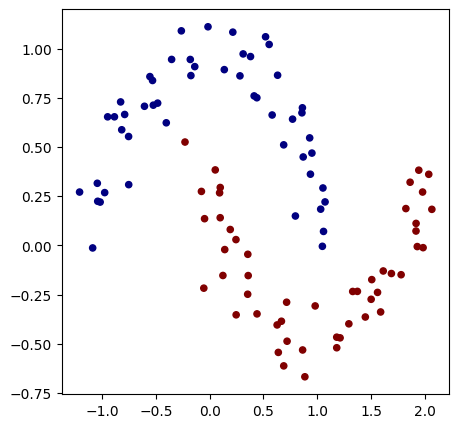

In [3]:
# Create a dataset for classification
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y -1 or 1
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [4]:
# Create a multilayer perceptron
model = MultiLayerPerceptron(2, [16,16,1]) # 2-layer neural network
print(f"Number of parameters: {len(model.get_parameters())}")

Number of parameters: 337


In [5]:
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    # print(inputs[0])
    # print(model(inputs[0]))
    
    # print(scores)
    
    # svm "max-margin" loss
    # for yi, scorei in zip(yb, scores):
    #     print(yi)
    #     print(scorei)
    losses = [(1 + -yi*scorei[0]).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.get_parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei[0].data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=73.991397, grad=0.000000) 0.5


In [6]:
# optimization
for k in range(100):
    # print("A*********************")
    # print(model.get_parameters())
    
    # forward
    total_loss, acc = loss()
    # print("B*********************")
    # print(model.get_parameters())
    
    # backward
    model.zero_grad()
    # print("C*********************")
    # print(model.get_parameters())
    total_loss.backwards()
    # print("D*********************")
    # print(model.get_parameters())
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.get_parameters():
        # print(p.data)
        # print(p.grad)
        p.data -= learning_rate * p.grad
    # print("E*********************")
    # print(model.get_parameters())
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")


step 0 loss 73.99139687618435, accuracy 50.0%
step 1 loss 4.382040501136872, accuracy 50.0%
step 2 loss 1.1526034173293986, accuracy 50.0%
step 3 loss 1.152543480593437, accuracy 50.0%
step 4 loss 1.1524841164474837, accuracy 50.0%
step 5 loss 1.1524253242402964, accuracy 50.0%
step 6 loss 1.152367103327065, accuracy 50.0%
step 7 loss 1.1523094530693967, accuracy 50.0%
step 8 loss 1.1522523728353056, accuracy 50.0%
step 9 loss 1.1521958619992008, accuracy 50.0%
step 10 loss 1.1521399199418776, accuracy 50.0%
step 11 loss 1.1520845460505016, accuracy 50.0%
step 12 loss 1.1520297397186008, accuracy 50.0%
step 13 loss 1.1519755003460528, accuracy 50.0%
step 14 loss 1.1519218273390754, accuracy 50.0%
step 15 loss 1.1518687201102156, accuracy 50.0%
step 16 loss 1.151816178078336, accuracy 50.0%
step 17 loss 1.1517642006686095, accuracy 50.0%
step 18 loss 1.1517127873125026, accuracy 50.0%
step 19 loss 1.1516619374477712, accuracy 50.0%
step 20 loss 1.1516116505184457, accuracy 50.0%
step 21

(-1.6670717738661749, 2.0829282261338253)

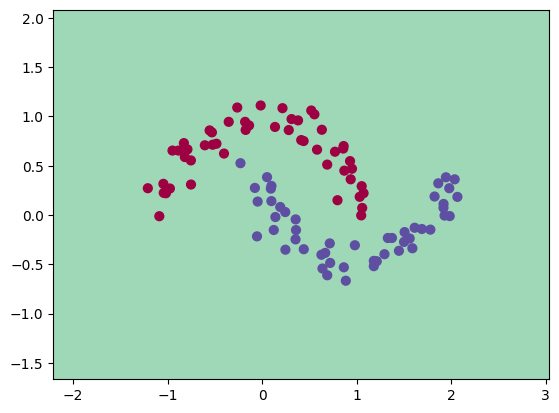

In [7]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s[0].data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())